In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/leo/Programming/PLR/Leo/main/final/grid_autoencoder/final_embedding/cl2/cl2_full_dataset.csv')

In [3]:
df

,Unnamed: 0,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,...,Demographics_Age_Cleaned,Flag_MECFS,Flag_POTS,Flag_MCAS,FAS,FAS_cat,Physical_PEM_Severity,Cognitive_PEM_Severity,HasPeriods,cluster
0,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,30-39,1.0,"No, no tachycardia",1.0,20.0,Minimal/No Fatigue,5.0,5.0,NaN,1
1,5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,40-49,1.0,"No, no tachycardia",0.0,30.0,Fatigue,9.0,7.0,"No, other reason",1
2,6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,40-49,1.0,"Possible, had tachycardia/palpitations",0.0,20.0,Minimal/No Fatigue,8.0,0.0,"No, other reason",5
3,8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,40-49,1.0,"Definite, measured bpm > 30",0.0,19.0,Minimal/No Fatigue,7.0,4.0,Yes,1
4,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,40-49,1.0,"Possible, had tachycardia/palpitations",0.0,20.0,Minimal/No Fatigue,10.0,0.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,50-59,1.0,"Possible, had tachycardia/palpitations",2.0,32.0,Fatigue,8.0,6.0,"No, post-menopausal",0
6027,14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,30-39,1.0,"Likely, had higher bpm standing",1.0,26.0,Fatigue,10.0,9.0,"No, other reason",4
6028,14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,30-39,0.0,"Definite, measured bpm > 30",1.0,33.0,Fatigue,8.0,7.0,Yes,1
6029,14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,60-69,0.0,"No, no tachycardia",0.0,18.0,Minimal/No Fatigue,NaN,NaN,NaN,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6031 entries, 0 to 6030
Columns: 176 entries, Unnamed: 0 to cluster
dtypes: float64(71), int64(99), object(6)
memory usage: 8.1+ MB


In [5]:
def calculate_cluster_sizes(df):
    """
    Calculate the sizes of each cluster in the DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame with a 'cluster' column.

    Returns:
    Series: A pandas Series with cluster labels as index and their respective sizes as values.
    """
    cluster_sizes = df.groupby('cluster').size()
    return cluster_sizes

In [6]:
calculate_cluster_sizes(df)

cluster
-1     222
 0    1125
 1    2126
 2     321
 3     498
 4     850
 5     889
dtype: int64

In [9]:
def average_symptom_count_by_cluster(df):
    """
    Calculate the average symptom count for each cluster in the DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame with columns for symptoms starting with "Symptom_" and a 'cluster' column.

    Returns:
    DataFrame: A pandas DataFrame with the average symptom count for each cluster.
    """
    # Filter columns that start with 'Symptom_'
    symptom_columns = [col for col in df.columns if col.startswith('Symptom_')]

    # Sum the symptom columns for each row
    df['total_symptoms'] = df[symptom_columns].sum(axis=1)

    # Calculate the average symptom count for each cluster
    average_symptoms = round(df.groupby('cluster')['total_symptoms'].mean(),0)

    return average_symptoms

# Example usage
# Assuming you have your DataFrame loaded as 'df'
average_symptoms = average_symptom_count_by_cluster(df)
print(average_symptoms)


cluster
-1    16.0
 0    44.0
 1    60.0
 2    35.0
 3    46.0
 4    28.0
 5    37.0
Name: total_symptoms, dtype: float64


In [10]:
for col in df.columns:
    print(col)

Unnamed: 0
Symptom_Memory_short
Symptom_Memory_long
Symptom_Memory_no_new_memories
Symptom_Memory_forget_tasks
Symptom_Memory_other
Symptom_Cognitive_Functioning_thinking
Symptom_Cognitive_Functioning_executive
Symptom_Cognitive_Functioning_problemsolving
Symptom_Cognitive_Functioning_slowedthoughts
Symptom_Cognitive_Functioning_fastthoughts
Symptom_Cognitive_Functioning_agnosia
Symptom_Cognitive_Functioning_attentionconcentration
Symptom_Cognitive_Functioning_other
Symptom_Speech_difficulty_finding_words
Symptom_Speech_difficulty_communicating_verbally
Symptom_Speech_difficulty_reading_processing_text
Symptom_Speech_difficulty_understanding_others_speech
Symptom_Speech_difficulty_speaking_complete_sentences
Symptom_Speech_speaking_unrecognizable_words
Symptom_Speech_difficulty_communicating_writing
Symptom_Speech_changes_to_secondary_languages
Symptom_Speech_other
Symptom_Headaches_behind_eyes
Symptom_Headaches_stiff_neck
Symptom_Headaches_brain_pressure
Symptom_Headaches_diffuse
Symp

In [11]:
df["Demographics_Gender_Cleaned"].value_counts()

Demographics_Gender_Cleaned
Woman                                           4703
Man                                             1205
Non-binary/Genderqueer/Gender non-conforming     100
Name: count, dtype: int64

In [16]:
df["Demographics_Age_Cleaned"].value_counts()

Demographics_Age_Cleaned
40-49    1725
50-59    1460
30-39    1352
60-69     736
18-29     526
70-79     213
80+        19
Name: count, dtype: int64

In [15]:
def average_women_to_other_ratio_by_cluster(df):
    """
    Calculate the average ratio of 'Women' to 'Other' for each cluster in the DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame with a 'Demographics_Gender_Cleaned' and a 'cluster' column.

    Returns:
    Series: A pandas Series with cluster labels as index and the average ratio of 'Women' to 'Other' as values.
    """
    # Create a new column for 'Woman' (1) and 'Other' (0)
    df['woman_or_other'] = df['Demographics_Gender_Cleaned'].apply(lambda x: 1 if x == 'Woman' else 0)

    # Calculate the average ratio for each cluster
    average_ratios = round(df.groupby('cluster')['woman_or_other'].mean(),3)

    return average_ratios

average_women_to_other_ratio_by_cluster(df)

cluster
-1    0.667
 0    0.795
 1    0.830
 2    0.791
 3    0.791
 4    0.714
 5    0.721
Name: woman_or_other, dtype: float64

In [17]:
def convert_age(age_string):
    conversion_dict = {
        '30-39': 35,
        '40-49': 45,
        '50-59': 55,
        '18-29': 24,
        '60-69': 65,
        '70-79': 75,
        '80+': 85
    }
    return conversion_dict[age_string]

def average_age_by_cluster(df):
    """
    Calculate the average age for each cluster in the DataFrame, rounded to one decimal place.

    Parameters:
    df (DataFrame): A pandas DataFrame with a 'Demographics_Age_Cleaned' and a 'cluster' column.

    Returns:
    DataFrame: A pandas DataFrame with cluster labels as index and the average age as values, rounded to one decimal place.
    """
    # Convert age ranges to average ages
    df['average_age'] = df['Demographics_Age_Cleaned'].apply(convert_age)

    # Calculate the average age for each cluster
    average_ages = df.groupby('cluster')['average_age'].mean().round(1)

    return average_ages

In [18]:
average_age_by_cluster(df)

cluster
-1    47.6
 0    47.3
 1    46.7
 2    45.9
 3    46.3
 4    47.7
 5    47.1
Name: average_age, dtype: float64

In [22]:
df["Cognitive_PEM_Severity"].value_counts()

Cognitive_PEM_Severity
8.0     772
7.0     724
0.0     610
5.0     603
6.0     565
10.0    520
9.0     479
4.0     346
3.0     298
2.0     216
1.0     196
Name: count, dtype: int64

In [23]:
def average_normalized_pem_severity_by_cluster(df):
    """
    Calculate the average normalized PEM severity for each cluster in the DataFrame.

    Parameters:
    df (DataFrame): A pandas DataFrame with a 'Physical_PEM_Severity' column and a 'cluster' column.

    Returns:
    Series: A pandas Series with cluster labels as index and the average normalized PEM severity as values.
    """
    # Normalize the 'Physical_PEM_Severity' column
    df['normalized_pem_severity'] = df['Cognitive_PEM_Severity'] / 10

    # Calculate the average normalized PEM severity for each cluster
    average_severity = round(df.groupby('cluster')['normalized_pem_severity'].mean(),3)

    return average_severity

average_normalized_pem_severity_by_cluster(df)

cluster
-1    0.271
 0    0.549
 1    0.636
 2    0.485
 3    0.594
 4    0.480
 5    0.530
Name: normalized_pem_severity, dtype: float64

/var/folders/dt/bgs1hq3d2k3dvhpt3llvs4rw0000gn/T/ipykernel_15023/4166682271.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sympdf['cluster'] = clusters.iloc[:, -1]


,Memory,Cognitive,Speech,Auditory,Headaches,Olfaction,Gastrointenstinal,Sensory,Motor,Sleep,Vision,Temperature,Cardiac,Respiratory,Allergic,Genitourinary,Skin,Musculoskeletal,Misc
cluster,,,,,,,,,,,,,,,,,,,
-1,0.221622,0.081982,0.048423,0.050050,0.061712,0.175676,0.134635,0.094595,0.083333,0.058559,0.052177,0.082207,0.152252,0.203266,0.097097,0.044144,0.078829,0.070946,0.128734
0,0.326756,0.373600,0.191889,0.193086,0.283200,0.213556,0.369580,0.238420,0.254444,0.203378,0.190593,0.515778,0.451733,0.419333,0.186864,0.089778,0.179778,0.470222,0.277380
1,0.386830,0.471966,0.267874,0.285879,0.376905,0.262935,0.475645,0.329832,0.365357,0.564064,0.284729,0.581903,0.543838,0.468309,0.247622,0.137112,0.240710,0.580550,0.337080
2,0.296573,0.300935,0.122274,0.145033,0.211526,0.179907,0.280374,0.177570,0.196262,0.162305,0.139668,0.366044,0.388785,0.379673,0.125649,0.070093,0.135514,0.352804,0.237908
3,0.327309,0.384739,0.188002,0.204819,0.306426,0.205321,0.364123,0.238956,0.282631,0.470080,0.198293,0.393323,0.470281,0.402108,0.154395,0.090562,0.153112,0.456325,0.280385
4,0.299294,0.312118,0.123529,0.118954,0.193529,0.156176,0.216209,0.153725,0.165000,0.127059,0.115196,0.052206,0.316000,0.337059,0.103660,0.060118,0.089412,0.320882,0.204272
5,0.315636,0.344657,0.153965,0.165104,0.242070,0.183915,0.282340,0.201100,0.241001,0.440270,0.150169,0.064820,0.386727,0.343785,0.135358,0.078403,0.112486,0.377109,0.232254


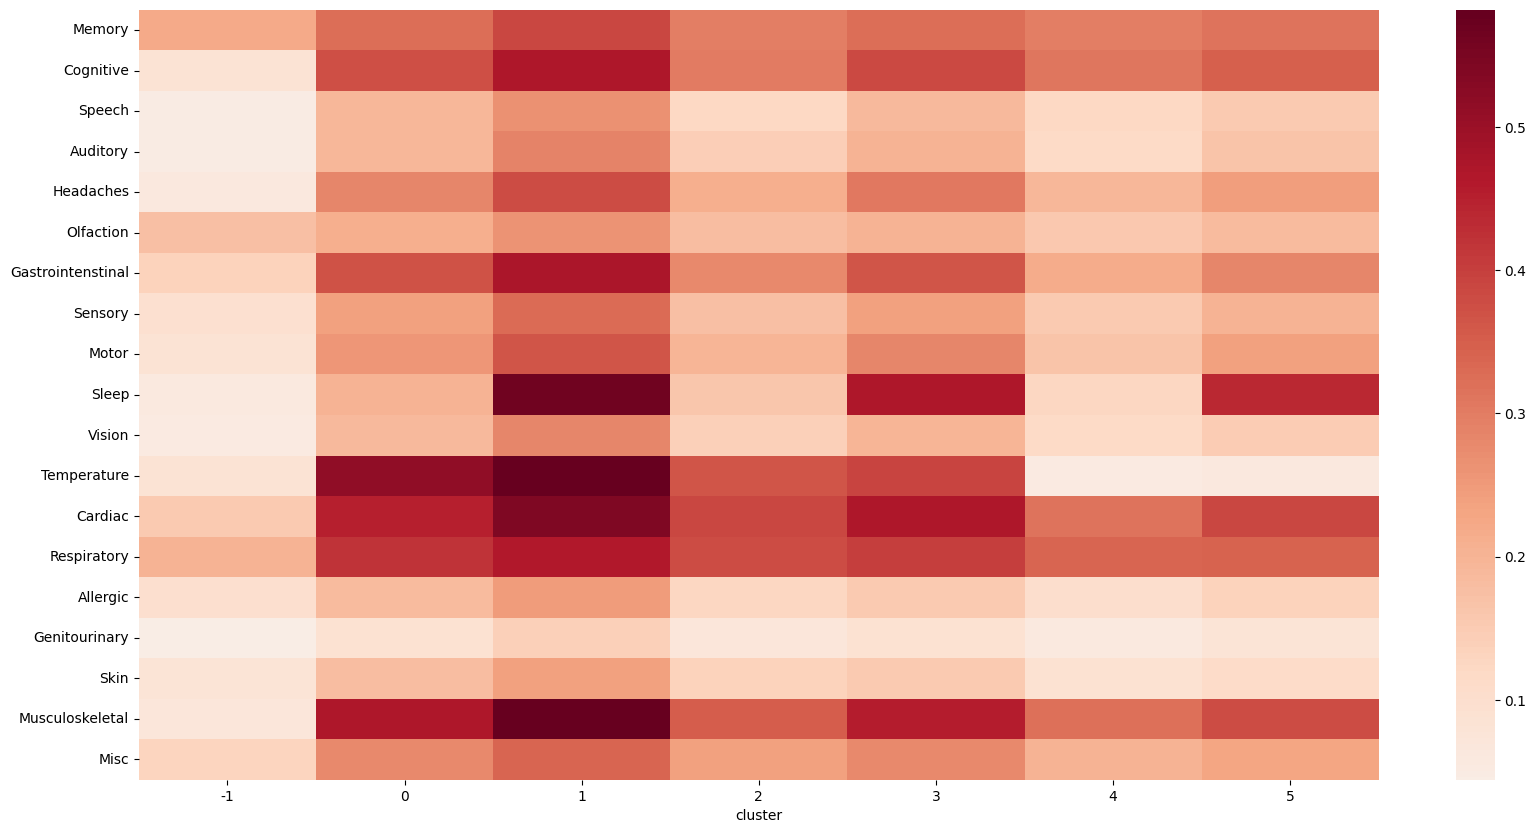

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_symp_group_freq(clusters, symp_groups=None, sympdf=None, include_misc=True, mode="mean", saveloc=None):
    """
    Plot symptom group frequencies by cluster.

    Parameters:
    clusters (str or DataFrame): Path to CSV file with clusters or DataFrame with clusters.
    symp_groups (DataFrame, optional): DataFrame with symptom groups. Default is None.
    sympdf (DataFrame, optional): DataFrame with symptoms. Default is None.
    include_misc (bool): Whether to include 'Misc' group. Default is True.
    mode (str): Aggregation mode, 'mean' by default.
    saveloc (str, optional): Location to save the plot. Default is None.

    Returns:
    DataFrame: Average scores by symptom group.
    """
    # Read clusters from CSV if it's a string
    if isinstance(clusters, str):
        clusters = pd.read_csv(clusters, index_col=0)

    if sympdf is None:
        df = pd.read_csv("/Users/leo/Programming/PLR/Leo/data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
        sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]

    if symp_groups is None:
        symp_groups = pd.read_csv("/Users/leo/Programming/PLR/clusterings/tessa/symptom_groups.csv")

    if not include_misc:
        symp_groups = symp_groups[symp_groups['group'].isin(['Misc', 'misc']) == False]

    sympdf['cluster'] = clusters.iloc[:, -1]
    
    if mode == "mean":
        avg_scores_by_grouping = {}

        for grouping in symp_groups.group.unique():
            keepcols = symp_groups.loc[symp_groups.group == grouping, 'symptom'].tolist()
            keepcols.append('cluster')
            a = sympdf.loc[:, keepcols]
            avg = a.groupby('cluster').mean()
            avg_scores_by_grouping[grouping] = avg.mean(axis=1)

        avgdf = pd.DataFrame(avg_scores_by_grouping)
        plt.figure(figsize=(20, 10))
        sns.heatmap(avgdf.transpose(), cmap='RdBu_r', center=0)

        if saveloc is not None:
            plt.savefig(saveloc)

        return avgdf

    
plot_symp_group_freq("/Users/leo/Programming/PLR/clusterings/leo/final_aencoder_hdbscan_6.csv")